# Computer simulations course 2018/2019-2 @ ELTE
# Assignment 2: Simple Pendulum - Expansion DLC: Double Pendulum
## 02.19.2019

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import sys
from scipy import stats

In [3]:
sns.set_style(style='whitegrid')

In [4]:
#url: https://ir.canterbury.ac.nz/bitstream/handle/10092/12659/chen_2008_report.pdf

In [5]:
# -------- PRIMARY PARAMETERS --------
# Masses of pendulums m_1, m_2
m_1 = 1
m_2 = 1
# Length of pendulums L_1, L_2
L_1 = 1
L_2 = 1
# Damping coefficients q_1, q_2
q_1 = 0
q_2 = 0
# Driving frequencies Omega_D_1, Omega_D_2
Omega_D_1 = 0
Omega_D_2 = 0
# Driving amplitudes F_D_1, F_D_2
F_D_1 = 0
F_D_2 = 0
# Theta(0)
theta_1 = 30
theta_2 = 60
theta_1 *= np.pi/180
theta_2 *= np.pi/180
# Omega(ω)
omega_1 = 0
omega_2 = 0

# Integration time t_iteration
t_iteration = 40
# Stepsize
dt = 0.1


# -------- OTHERS --------
# Accuracy
accuracy = 1e-6

In [6]:
def mode_choose(mode):
    
    current_mode = ('..\Release\pendulum_double.exe ' +
                    mode + ' ' +
                    str(m_1) + ' ' +
                    str(m_2) + ' ' +
                    str(L_1) + ' ' +
                    str(L_2) + ' ' +
                    str(q_1) + ' ' +
                    str(q_2) + ' ' +
                    str(Omega_D_1) + ' ' +
                    str(Omega_D_2) + ' ' +
                    str(F_D_1) + ' ' +
                    str(F_D_2) + ' ' +
                    str(theta_1) + ' ' +
                    str(theta_2) + ' ' +
                    str(omega_1) + ' ' +
                    str(omega_2) + ' ' +
                    str(t_iteration) + ' ' +
                    str(dt) + ' ' +
                    str(accuracy)
                )
    
    return(current_mode)

In [7]:
mode_runge = mode_choose(mode='runge')
mode_rkck = mode_choose(mode='rkck')
mode_euler = mode_choose(mode='euler')
mode_cromer = mode_choose(mode='eulercromer')

In [12]:
os.system(mode_runge)
data_runge = np.genfromtxt('pendulum_double.dat')

os.system(mode_rkck)
data_rkck = np.genfromtxt('pendulum_double.dat')

'''os.system(mode_euler)
data_euler = np.genfromtxt('pendulum_double.dat')

os.system(mode_cromer)
data_eulercromer = np.genfromtxt('pendulum_double.dat')''';

In [9]:
steps = 1
image_dpi = 150
image_format = 'pdf'

## 4th-order Runge-Kutta

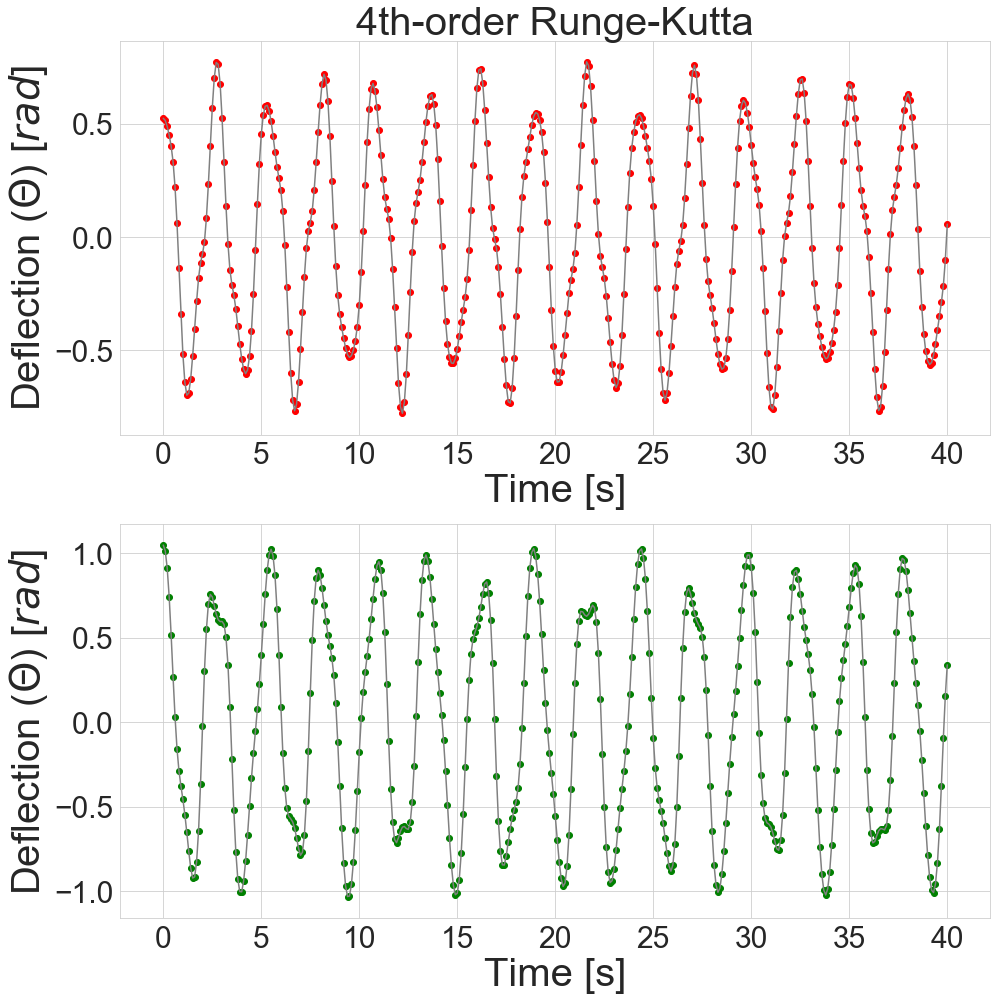

In [10]:
nrows = 2
ncols = 1
fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(ncols*14, nrows*7))

axes[0].plot(data_runge[::steps,0], data_runge[::steps,1], color='grey')
axes[1].plot(data_runge[::steps,0], data_runge[::steps,3], color='grey')

axes[0].scatter(data_runge[::steps,0], data_runge[::steps,1], color='red')
axes[1].scatter(data_runge[::steps,0], data_runge[::steps,3], color='green')

axes[0].set_title('4th-order Runge-Kutta', fontsize=40)

axes[0].set_xlabel('Time [s]', fontsize=40)
axes[1].set_xlabel('Time [s]', fontsize=40)

axes[0].set_ylabel('Deflection ($\Theta$) [$rad$]', fontsize=40)
axes[1].set_ylabel('Deflection ($\Theta$) [$rad$]', fontsize=40)

axes[0].tick_params(axis='both', which='major', labelsize=30)
axes[1].tick_params(axis='both', which='major', labelsize=30)

fig.tight_layout()
plt.savefig('..\\Documentation\\src\\images\\theta_omega_runge_double.' + image_format, format=image_format, dpi=image_dpi)
plt.show()

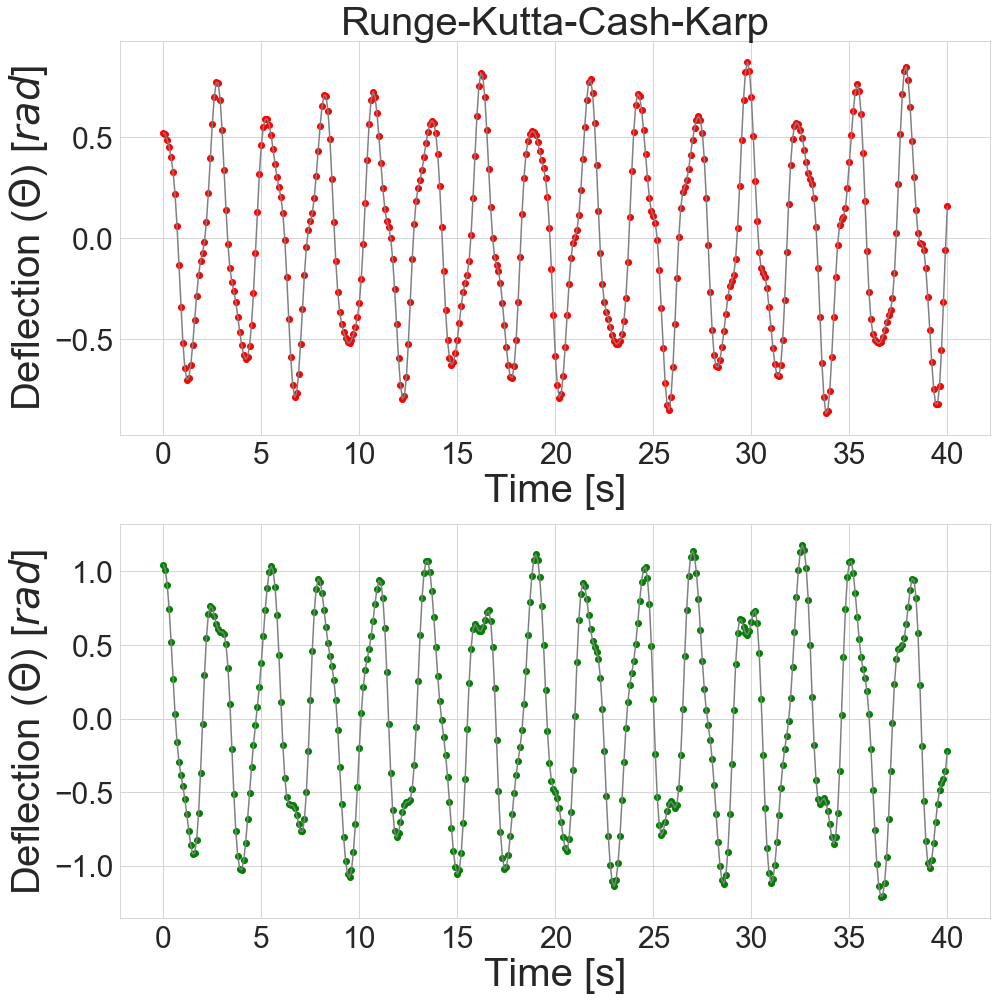

In [11]:
nrows = 2
ncols = 1
fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(ncols*14, nrows*7))

axes[0].plot(data_rkck[::steps,0], data_rkck[::steps,1], color='grey')
axes[1].plot(data_rkck[::steps,0], data_rkck[::steps,3], color='grey')

axes[0].scatter(data_rkck[::steps,0], data_rkck[::steps,1], color='red')
axes[1].scatter(data_rkck[::steps,0], data_rkck[::steps,3], color='green')

axes[0].set_title('Runge-Kutta-Cash-Karp', fontsize=40)

axes[0].set_xlabel('Time [s]', fontsize=40)
axes[1].set_xlabel('Time [s]', fontsize=40)

axes[0].set_ylabel('Deflection ($\Theta$) [$rad$]', fontsize=40)
axes[1].set_ylabel('Deflection ($\Theta$) [$rad$]', fontsize=40)

axes[0].tick_params(axis='both', which='major', labelsize=30)
axes[1].tick_params(axis='both', which='major', labelsize=30)

fig.tight_layout()
plt.savefig('..\\Documentation\\src\\images\\theta_omega_rkck_double.' + image_format, format=image_format, dpi=image_dpi)
plt.show()